In [4]:
%matplotlib inline

import os

from pprint import pprint

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

In [6]:
path_to_load = 'final-outputs/lc-cnn-accuracy-all-c64-5-36-v-c256-3-5-v-d256-d128-d16-d0.1.csv'
df = pd.read_csv(path_to_load, index_col=False)
df.describe()

,test,training,validation
count,100.000000,100.000000,100.000000
mean,0.357567,0.356603,0.357297
std,0.016189,0.014596,0.015643
min,0.287000,0.307000,0.295000
25%,0.352167,0.351250,0.351500
50%,0.362333,0.361667,0.361667
75%,0.368083,0.365750,0.367083
max,0.389000,0.379667,0.391000


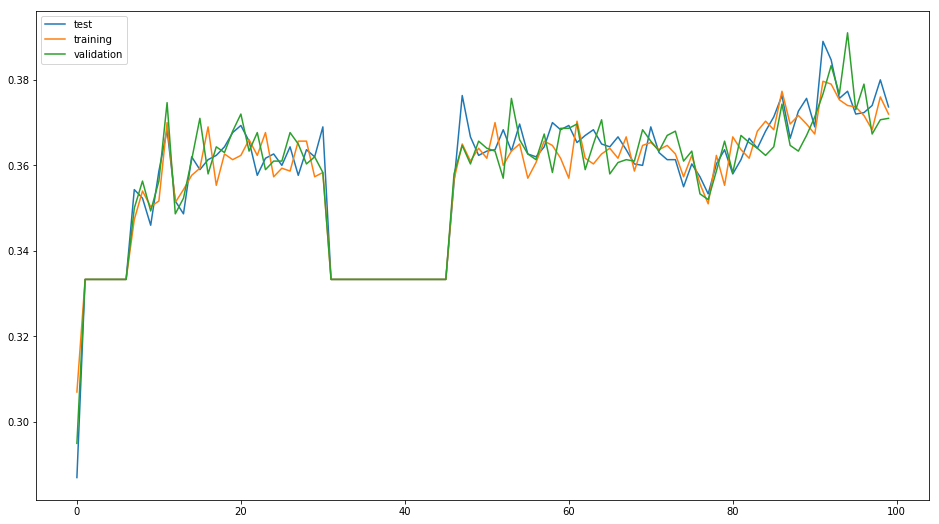

In [8]:
df.plot(figsize=(16, 9))

In [19]:
path_to_load = 'data/cf-all-validation.csv'
df = pd.read_csv(path_to_load, index_col=False)
df.describe()

,Acceleration,Leader distance,Next TLS distance,Next TLS green,Next TLS red,Next TLS yellow,Speed,Speed to leader
count,1648.000000,1648.000000,1648.000000,1648.000000,1648.00000,1648.000000,1648.000000,1648.000000
mean,-0.009816,0.180789,0.542736,0.320388,0.42233,0.257282,3.791904,-0.016300
std,0.075808,0.086763,0.385773,0.466767,0.49408,0.437269,3.434180,1.016424
min,-0.400000,0.010023,0.012896,0.000000,0.00000,0.000000,0.000000,-22.718005
25%,-0.051959,0.117296,0.170259,0.000000,0.00000,0.000000,1.255887,-0.070057
50%,0.000000,0.161975,0.445012,0.000000,0.00000,0.000000,3.369611,-0.003798
75%,0.032539,0.232343,1.000000,1.000000,1.00000,1.000000,5.392664,0.062176
max,0.202177,0.676639,1.000000,1.000000,1.00000,1.000000,19.800000,21.802065


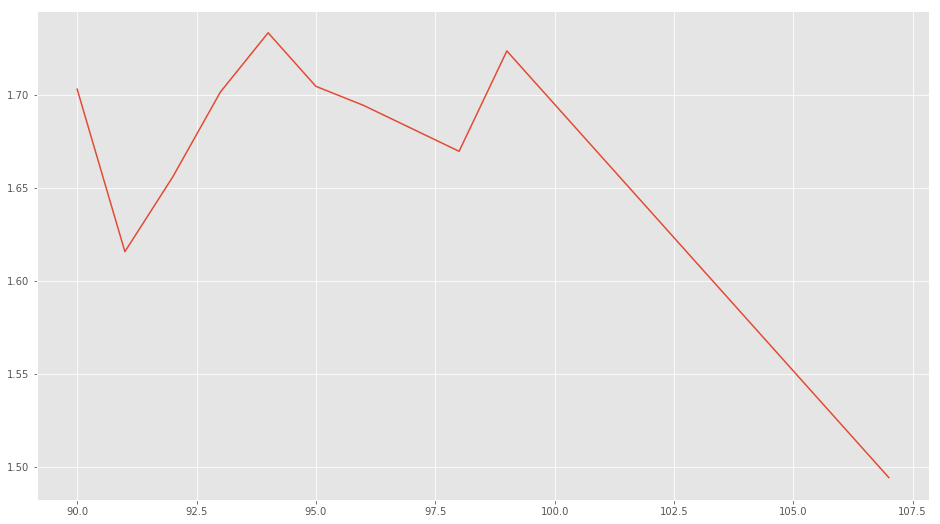

In [7]:
#df[df['Acceleration'] > 0.5]['Acceleration'].plot();
df[df['Acceleration'] > 0.5]['Acceleration'].plot();

In [ ]:
f = tf.constant([[
    [
        [.1, .1, .1],
        [.1, .2, .1],
        [.1, .1, .1],
        [.1, .3, .1],
        [.1, .1, .1],
        [.1, .4, .1],
        [.1, .1, .1],
        [.1, .5, .1],
        [.1, .1, .1],
        [.1, .2, .1],
    ],
    [
        [.1, .1, .1],
        [.1, .1, .3],
        [.1, .1, .1],
        [.1, .1, .2],
        [.1, .1, .1],
        [.1, .1, .1],
        [.1, .1, .1],
        [.1, .1, .3],
        [.1, .1, .1],
        [.1, .1, .1],
    ],
]], dtype=np.float32)

sess = tf.InteractiveSession()
print(f.eval().shape)
f = tf.reduce_sum(f, 3, keepdims=True)
print(f.eval())
f = 1 - f / tf.reduce_max(f)
print(f.eval().shape)

In [ ]:
df = pd.read_csv(path_to_load, index_col=False, dtype=np.float32)
print(df.memory_usage(deep=True).sum() / 1024 ** 2)
df[['Next TLS green', 'Next TLS red', 'Next TLS yellow']] = df[['Next TLS green', 'Next TLS red', 'Next TLS yellow']].astype(np.uint8)
print(df.memory_usage(deep=True).sum() / 1024 ** 2)

In [ ]:
leader_distance = sequence['Leader distance'].apply(lambda x: relative_bounded(x, MAX_LEADER_DISTANCE))
next_tls_distance = sequence['Next TLS distance'].apply(lambda x: relative_bounded(x, MAX_TLS_DISTANCE))
next_tls_status = sequence['Next TLS status'].apply(status_to_number)
speed_to_leader = (sequence['Leader distance'] - sequence['Leader distance'].shift(1))

In [ ]:
# Suavizamos la velocidad un poco
speed = df['gps_speeds_speed'].rolling(10, center=True).mean()

# Calculamos la aceleración a partir de los incrementos de la velocidad
acceleration = speed.shift(-1) - speed